With initial theta values of [0. 0. 0.], cost error is 2035743.357142857


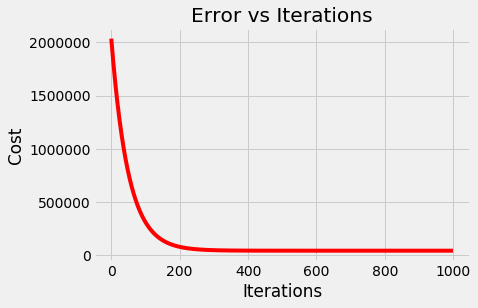

With final theta values of [1582.36025601  123.59524132 1212.38969865], cost error is 43939.31418170062


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def cost_function(X, y, theta):
    m = y.size
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

def gradient_descent(X, y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    m = y.size
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array

def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

def run():
    # Import data
    data = pd.read_excel('C:/Users/kxj133/Downloads/task_9_5/data_data_1.xlsx')
    data.columns = ['col1','col2','target']

    # Extract data into X and y
    X = data[['col1', 'col2']]
    y = data['target']

    # Normalize our features
    X = (X - X.mean()) / X.std()

    # Add a 1 column to the start to allow vectorized gradient descent
    X = np.c_[np.ones(X.shape[0]), X] 

    # Set hyperparameters
    alpha = 0.01
    iterations = 1000

    # Initialize Theta Values to 0
    theta = np.zeros(X.shape[1])
    initial_cost, _ = cost_function(X, y, theta)

    print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))

    # Run Gradient Descent
    theta, cost_num = gradient_descent(X, y, theta, alpha, iterations)

    # Display cost chart
    plotChart(iterations, cost_num)

    final_cost, _ = cost_function(X, y, theta)

    print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

if __name__ == "__main__":
    run()